### 1. Set Review

In [1]:
A = {2, 4, 6, 8, 10}
B = {1, 2, 3, 4, 5}
C = {4, 5, 6, 7, 8}

# (A \ B) ∪ (A ∩ B) = A
lhs1 = (A - B) | (A & B)
rhs1 = A
print(lhs1 == rhs1)

# A ∪ (B ∩ C) = (A ∪ B) ∩ (A ∪ C)
lhs2 = A | (B & C)
rhs2 = (A | B) & (A | C)
print(lhs2 == rhs2)

# A \ (B ∪ C) = (A \ B) ∩ (A \ C)
lhs3 = A - (B | C)
rhs3 = (A - B) & (A - C)
print(lhs3 == rhs3)

# A \ (B ∩ C) = (A \ B) ∪ (A \ C)
lhs4 = A - (B & C)
rhs4 = (A - B) | (A - C)
print(lhs4 == rhs4)

True
True
True
True


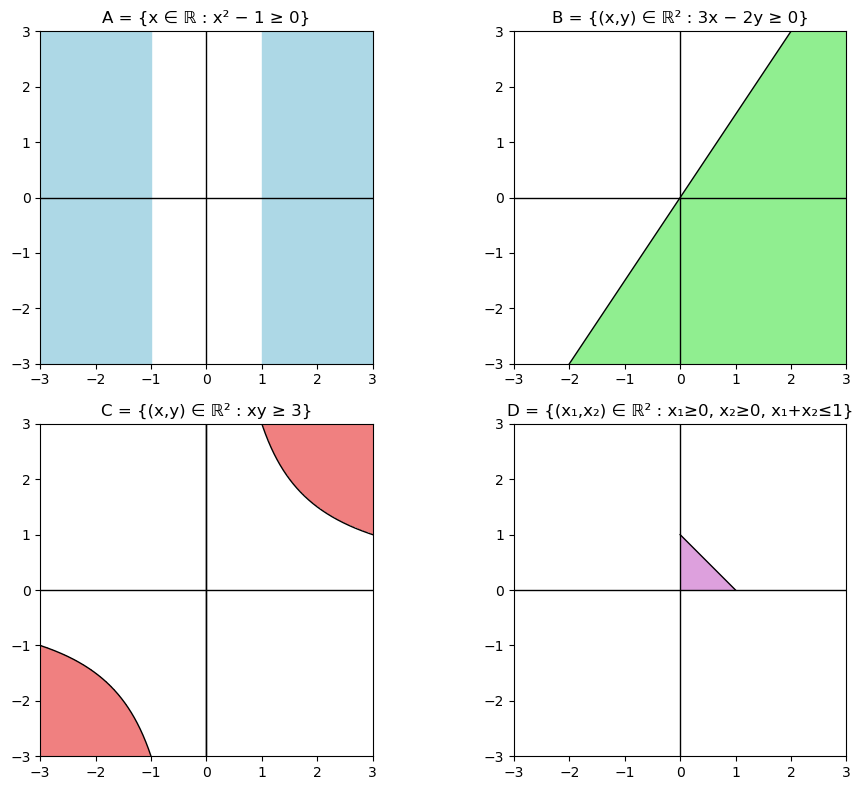

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xmin, xmax = -3, 3
ymin, ymax = -3, 3
n = 800

x = np.linspace(xmin, xmax, n)
y = np.linspace(ymin, ymax, n)
X, Y = np.meshgrid(x, y)

with np.errstate(divide='ignore', invalid='ignore'):
    maskC = ((X > 0) & (Y >= 3/X)) | ((X < 0) & (Y <= 3/X))
maskB = (3*X - 2*Y >= 0)
maskD = (X >= 0) & (Y >= 0) & (X + Y <= 1)

def shade(ax, mask, color):
    Z = np.zeros_like(mask, dtype=float)
    Z[mask] = 1.0
    ax.imshow(Z, origin='lower', extent=[xmin, xmax, ymin, ymax],
              cmap=plt.matplotlib.colors.ListedColormap(['white', color]),
              vmin=0, vmax=1, interpolation='nearest')

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

ax = axes[0, 0]
ax.axvspan(xmin, -1, color='lightblue')
ax.axvspan(1, xmax, color='lightblue')
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_title('A = {x ∈ ℝ : x² − 1 ≥ 0}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

ax = axes[0, 1]
shade(ax, maskB, 'lightgreen')
ax.plot(x, (3/2)*x, 'k', lw=1)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_title('B = {(x,y) ∈ ℝ² : 3x − 2y ≥ 0}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

ax = axes[1, 0]
shade(ax, maskC, 'lightcoral')
ax.plot(x[x!=0], 3/x[x!=0], 'k', lw=1)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_title('C = {(x,y) ∈ ℝ² : xy ≥ 3}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

ax = axes[1, 1]
shade(ax, maskD, 'plum')
ax.plot([0,1],[1,0], 'k', lw=1)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_title('D = {(x₁,x₂) ∈ ℝ² : x₁≥0, x₂≥0, x₁+x₂≤1}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()


For \( A = \{1, 2, 3\} \):

$$
\mathcal{P}(A) = \{ \varnothing, \{1\}, \{2\}, \{3\}, \{1,2\}, \{1,3\}, \{2,3\}, \{1,2,3\} \}
$$

There are \( 2^3 = 8 \) subsets in total.

## 2. Probability Space Basics

### Rolling a single fair three-sided die

**Sample space**  
$S = \{1, 2, 3\}$

**Number of outcomes**  
$n(S) = 3$

**Probability of each outcome**  
Since the die is fair:
$$
P(1) = P(2) = P(3) = \frac{1}{3}
$$

**Set of all events**  
The power set:
$$
\mathcal{P}(S) = \{\varnothing, \{1\}, \{2\}, \{3\}, \{1,2\}, \{1,3\}, \{2,3\}, \{1,2,3\}\}
$$
There are $2^3 = 8$ possible events in total.

---

### Rolling a fair three-sided die twice

**Sample space**
$$
S = \{(1,1), (1,2), (1,3), (2,1), (2,2), (2,3), (3,1), (3,2), (3,3)\}
$$

**Number of outcomes**  
$$
n(S) = 3^2 = 9
$$

**Probability of each outcome**  
Each outcome has probability $\frac{1}{9}$.

**Set of all events**  
The power set has $2^9 = 512$ possible events.

---

### Flipping a fair coin twice

**Sample space**
$$
S = \{\text{HH}, \text{HT}, \text{TH}, \text{TT}\}
$$

**Number of outcomes**  
$$
n(S) = 4
$$

**Probability of each outcome**  
Each outcome has probability $\frac{1}{4}$.

**Set of all events**  
There are $2^4 = 16$ possible events.

---

### Rolling the three-sided die twice and adding the results

**Possible sums**  
$$
\{2, 3, 4, 5, 6\}
$$

| Sum | Outcomes             | Count | Probability |
|:---:|----------------------|:-----:|:-----------:|
|  2  | (1,1)                |   1   | $\frac{1}{9}$ |
|  3  | (1,2), (2,1)         |   2   | $\frac{2}{9}$ |
|  4  | (1,3), (2,2), (3,1)  |   3   | $\frac{3}{9}$ |
|  5  | (2,3), (3,2)         |   2   | $\frac{2}{9}$ |
|  6  | (3,3)                |   1   | $\frac{1}{9}$ |

**Number of outcomes**  
$$
n(S) = 9
$$

**Number of events**  
$$
2^9 = 512
$$



## 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events?



---

-  Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.

---

- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and describe the space of events. What are the probabilities of the outcomes?

---

Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

---